In [9]:
import matplotlib.pyplot as plt
import numpy as np
from basicpy import data as bdata
from skimage.transform import rescale
from os import path

## Rescale data

cell_culture uint16


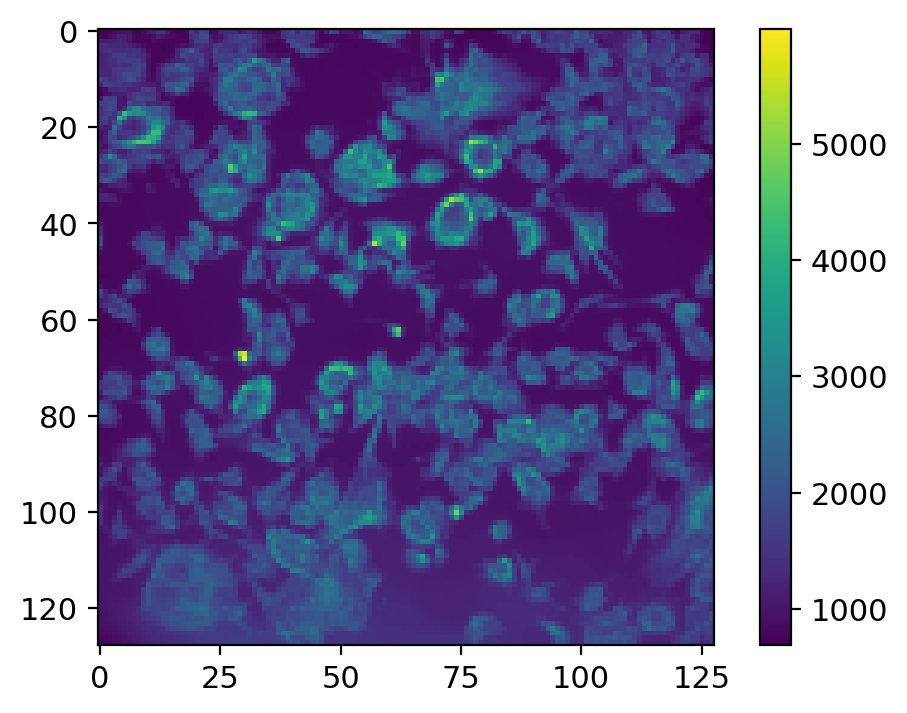

timelapse_brightfield uint8


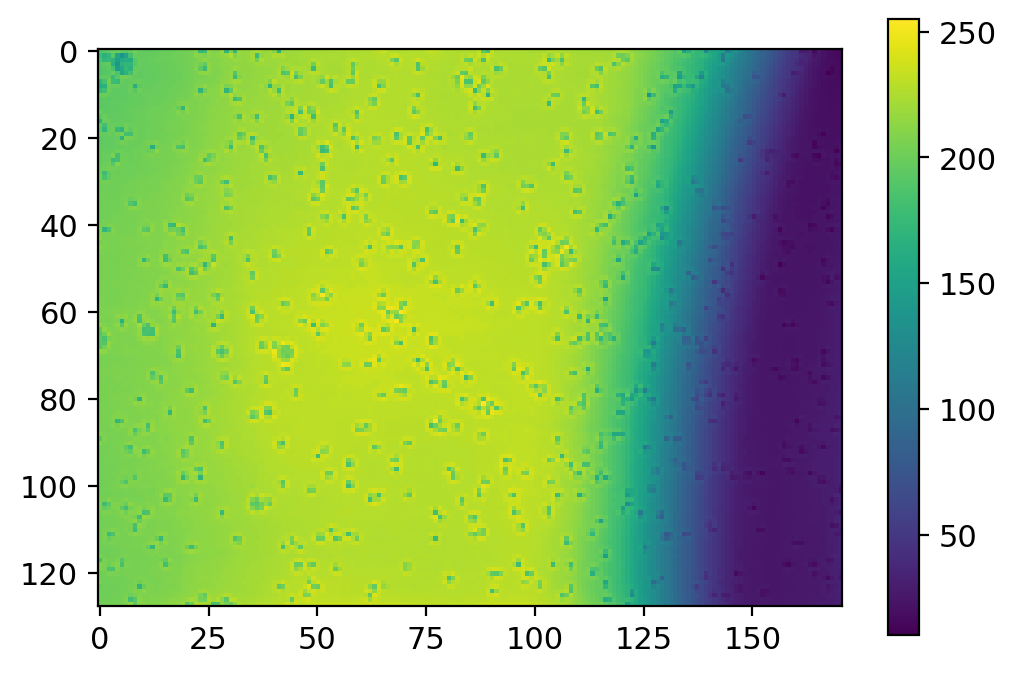

timelapse_nanog uint8


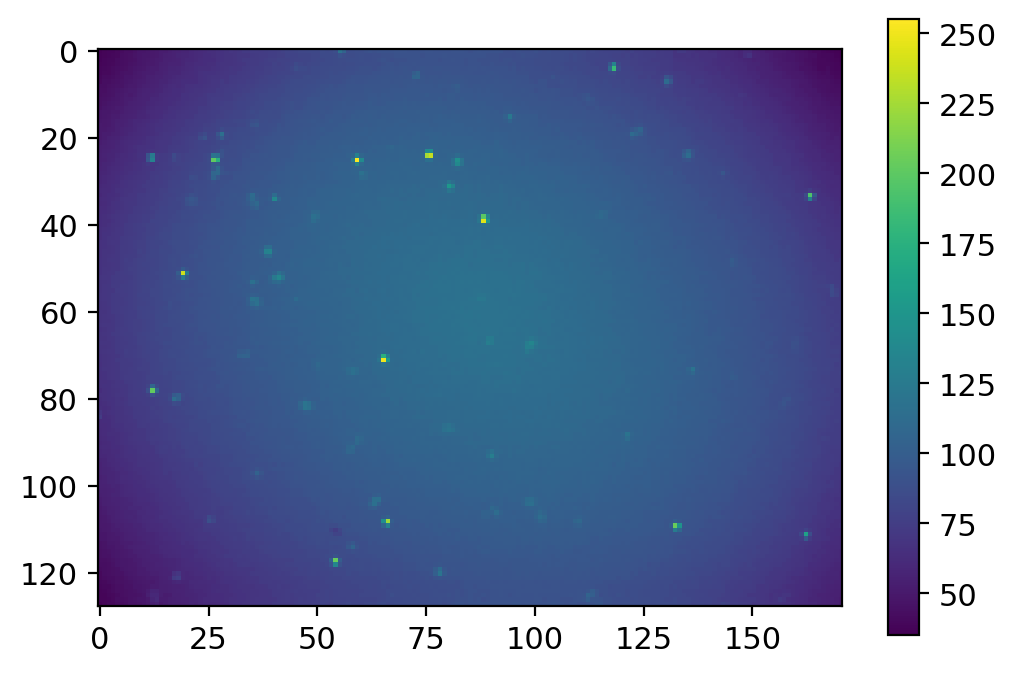

timelapse_pu1 uint8


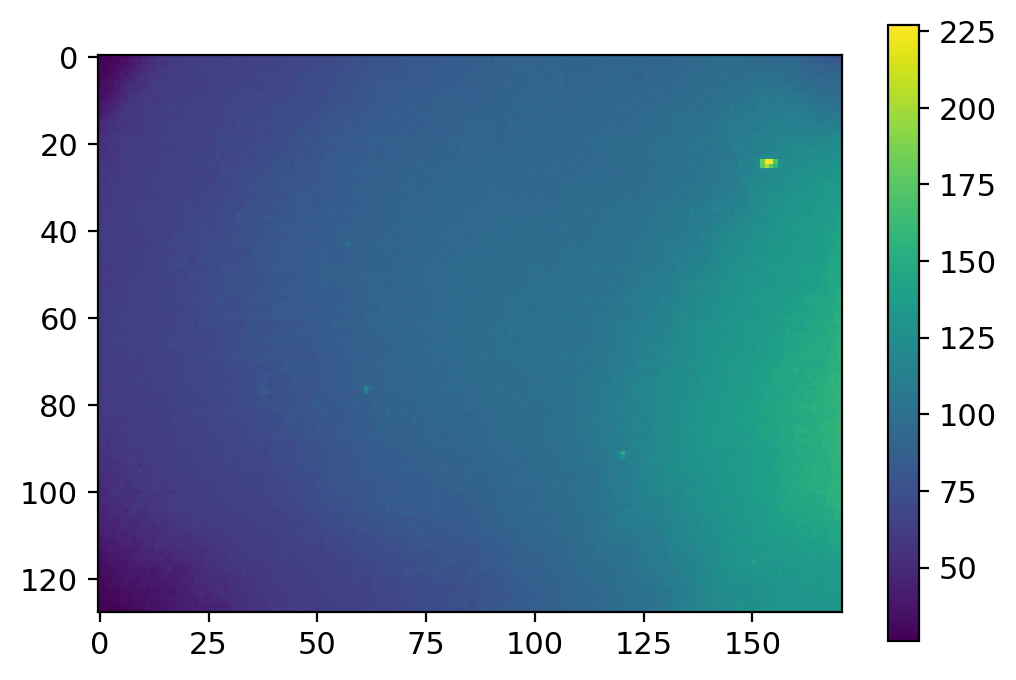

Unzipping contents of '/Users/fukai/Library/Caches/basicpy/WSI_Brain.zip' to '/Users/fukai/Library/Caches/basicpy/WSI_Brain.zip.unzip'


wsi_brain uint16


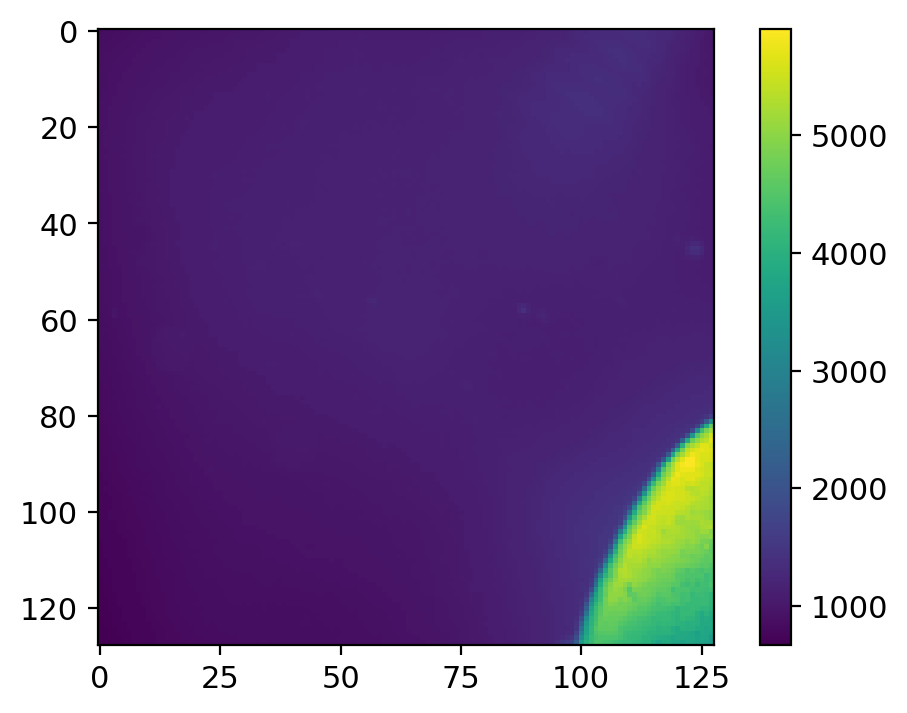

In [7]:
image_keys = list(bdata.ORIGINAL_TEST_DATA_PROPS.keys())


def normalize(x, q_vals):
    qs = np.quantile(x, q_vals)
    return (x - qs[0]) / (qs[1] - qs[0]) * 0.99 + 0.01


images_smalls = {}
for k in image_keys:
    images = bdata.fetch(k, original=True)
    images = np.array(list(images))
    dtype = images.dtype
    print(k, dtype)
    images = images.astype(np.float32)
    q_vals = [
        0,
        0.99999,
    ]  # if image_keys not in ["cell_culture","timelapse_nanog"] else [0,1]
    images_small = (
        (
            normalize(
                np.array(
                    [
                        rescale(im, 128 / np.min(images.shape[1:]), preserve_range=True)
                        for im in images
                    ]
                ),
                q_vals,
            )
            * np.iinfo(dtype).max
        )
        .clip(0, np.iinfo(dtype).max)
        .astype(dtype)
    )
    images_smalls[k] = images_small
    plt.imshow(images_small[10])
    plt.colorbar()
    plt.show()

In [10]:
for k in image_keys[:]:
    print(k)
    images = images_smalls[k]  # .astype(np.float32)
    fn = path.join("../data", k + ".npz")
    np.savez_compressed(fn, images=images)

cell_culture
timelapse_brightfield
timelapse_nanog
timelapse_pu1
wsi_brain
